<a href="https://colab.research.google.com/github/wellyfu66/algorithm/blob/master/%E5%82%85%E6%98%B1%E7%91%8B_109%E6%BC%94%E7%AE%97%E6%B3%95%E6%9C%9F%E6%9C%AB%E8%80%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**109演算法期末考**

*   每題25分共125分
*   1/13 23:59前完成不扣分;
*   11/14 11:59前減5分;11/14 23:59前減10分；1/15 11:59前減15分;
*   最遲需於1/15 11:59前繳交!
*   請在解題想法區塊寫上解題的想法/思路、所使用的演算法及其原因(最好有推導過程)
*   程式碼需可以執行，且依照題目說明的輸入輸出規範
*   檔名改成 XXX_109演算法期末考.ipynb







第一題：
請從一個整數Array中，找出第K大的元素

Exp：輸入: {5,3,8,2,9,4,6} 
          K=2
    輸出: Ans:8


解題想法：

In [47]:
#程式
6
def Selction_Sort(datas): #排順序
    for i in range(len(datas)-1):
        min = i
        for j in range(i+1, len(datas)):
            if datas[j] > datas[min]:       #找全部裡最大的
                min = j
        datas[i], datas[min] = datas[min], datas[i] #互換
    return datas

x = []
print("總共幾個數：")
a = int(input())
for i in range(a):
 x.append(input())
x = Selction_Sort(x)
k = int(input('第幾大？'))
print(x[(k-1)])

總共幾個數：
3
1
2
3
第幾大？2
2


第二題： 找零錢問題
目前有 1,2,5,10 四種面值的硬幣，請算出有總共有幾種方式湊N元?


Exp：輸入N=32，輸出：各種湊出32元的組合



解題想法：

In [ ]:
#程式
# t=面積
t = [10,5,2,1]
n = int(input())

#n = 多少錢
def change(t,n):
  m = [0 for _ in range(len(t))]
  for i,money in enumerate(t):
    m[i] = n // money
    n = n%money
    print(m,n)
  
      
change(t,n)

第三題： 有個小偷到3C用品店偷東⻄,假設他的背包的負重最多可達10公斤,他希望在背包中裝入負重範圍內可得之總價物品,小偷的背包應該怎麼裝才能帶走最有價值的商品?

* 每個商品只有拿走/留著這兩種狀況
* 每個商品不能被切割（如拿1/3個）
* 每個商品也不能被拿超過一次
* 請輸出所選擇的產品之編號，單價，總價，背包總重量


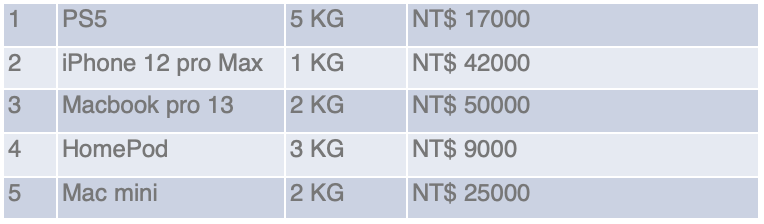








解題想法：
這裡的想法是使用背包greedy法

對於一開始的價值排序選擇使用selction sort來進行排序，

而在排序價值時同步進行背包負重array的調動，

在這裡有注意到有兩個2kg的東西，

但是價值不相同（且沒有干擾到從價值進行排序），

因此略過繼續進行。

In [1]:
#程式
# t=重量
t = [5,3,2,2,1]
v = [17000,9000,50000,25000,42000]
n = 10
#n = 總金額

#排列價值大小
def Selction_Sort(datas,data2):
    for i in range(len(datas)-1):           
        min = i                                          
        for j in range(i+1, len(datas)):       
            if datas[j] > datas[min]:                
                min = j                                               

        datas[i], datas[min] = datas[min], datas[i] #這裡使用selction sort 用價值進行排序
        data2[i], data2[min] = data2[min], data2[i] #而上面每一步驟的排序時 同時調動重量的array


        print(datas,data2)
    return datas

def change(t,n):
  m = [0 for _ in range(len(t))]
  for i,heavy in enumerate(t):
    m[i] = 1
    if n - heavy < 0:         #跳過過重的物品
      n = n
      m[i] = 0
    else: 
      n = n - heavy           #拿取一次的東西
    print(m,n)
    
    
    
Selction_Sort(v,t)
change(t,n)

[50000, 9000, 17000, 25000, 42000] [2, 3, 5, 2, 1]
[50000, 42000, 17000, 25000, 9000] [2, 1, 5, 2, 3]
[50000, 42000, 25000, 17000, 9000] [2, 1, 2, 5, 3]
[50000, 42000, 25000, 17000, 9000] [2, 1, 2, 5, 3]
[1, 0, 0, 0, 0] 8
[1, 1, 0, 0, 0] 7
[1, 1, 1, 0, 0] 5
[1, 1, 1, 1, 0] 0
[1, 1, 1, 1, 0] 0


第四題：請以深度優先搜尋(DFS)、廣度優先搜尋法(BFS)走訪有向圖中的所有節點，並印出兩種搜尋法的走訪順序

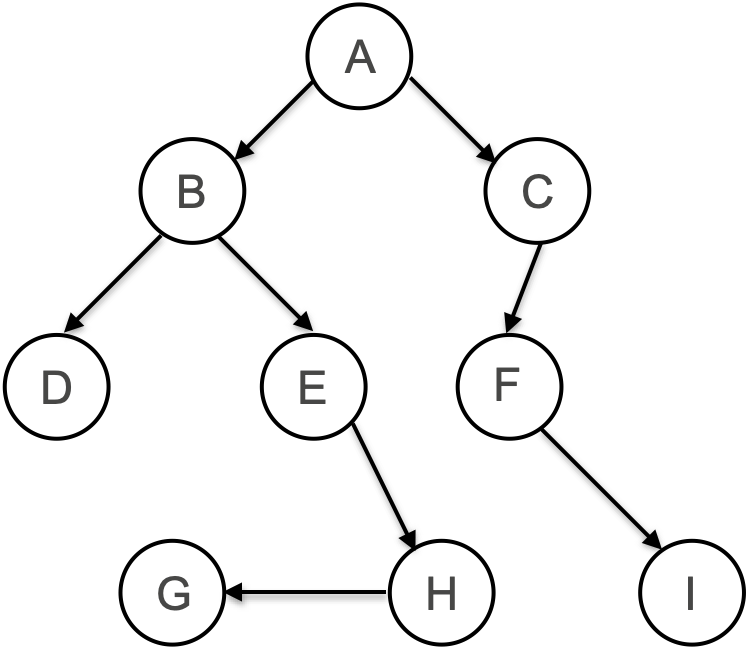

解題想法：
整個題目最為困難的要點就是要辨識當個節點是否已經為線路圖的最末端

因此我直接在線路圖的data裡面多設一個'0'

這個‘0'的用意是接在線路圖的末端的下一個的位置，例如：ＤＧＩ

而在他的標記則設爲已經訪問過

讓他無法繼續往下走，而讓他跳回到上一個節點繼續探索


In [15]:
#程式
def enqueue(a, o):
    a.insert(0, o)

def dequeue(a):
    return a.pop()

g = { #  graph: 被搜尋的網路
    '0': {'n':['0'], 'v':1},     #   線路的末端設定為'0' 並標示為已經訪問過 便會回傳到上一個節點繼續進行
    'A': {'n':['B','C'], 'v':0}, #  n: neighbor (鄰居), v: visited (是否被訪問過)
    'B': {'n':['D','E'], 'v':0},
    'C': {'n':['F'], 'v':0},
    'D': {'n':['0'], 'v':0},
    'E': {'n':['H'], 'v':0},
    'F': {'n':['I'], 'v':0},
    'G': {'n':['0'], 'v':0},
    'H': {'n':['G'], 'v':0},
    'I': {'n':['0'], 'v':0},
}

def init(g): #  初始化、設定 visited 為 0
    for i in g:
        g[i]['v'] = 0

def dfs(g, node): #  深度優先搜尋
    if g[node]['v']!=0:           #  如果已訪問過，就不再訪問
        return
    print(node, '=> ', end = '')  #  印出節點
    g[node]['v'] = 1              #  設定為已訪問
    neighbors = g[node]['n']      #  取出鄰居節點
    for n in neighbors:           #  對於每個鄰居
        dfs(g, n)                 #  逐一進行訪問

queue=['A'] #  BFS 用的 queue, 起始點為 1。

def bfs(g, q): #  廣度優先搜尋
    if len(q)==0:                 #  如果queue已空，則返回。
        return
    node = dequeue(q)             #  取出queue的第一個節點。
    if g[node]['v'] == 0:         #  如果該節點尚未拜訪過。
        g[node]['v'] = 1          #  標示為已拜訪
    else:                         #  (已訪問過)
        return                    #  不繼續搜尋，直接返回。
    print(node, '=> ', end = '')  #  印出節點
    neighbors = g[node]['n']      #  取出鄰居。
    for n in neighbors:           #  對於每個鄰居
        if not g[n]['v']:         #  假如該鄰居還沒被拜訪過
            enqueue(q, n)         #  放入queue中
    bfs(g, q)

print('dfs:', end = '')
init(g)
dfs(g, 'A') # 呼叫深度優先搜尋。
print('')

print('bfs:', end = '')
init(g)
bfs(g, queue) # 呼叫廣度優先搜尋。
print('')

dfs:A => B => D => 0 => E => H => G => C => F => I => 
bfs:A => B => C => D => E => F => 0 => H => I => G => 


第五題： 請用 Kruskal或Prim 演算法(2選1)找出下圖的最小生成樹，並依照順序寫出加入的每一個邊

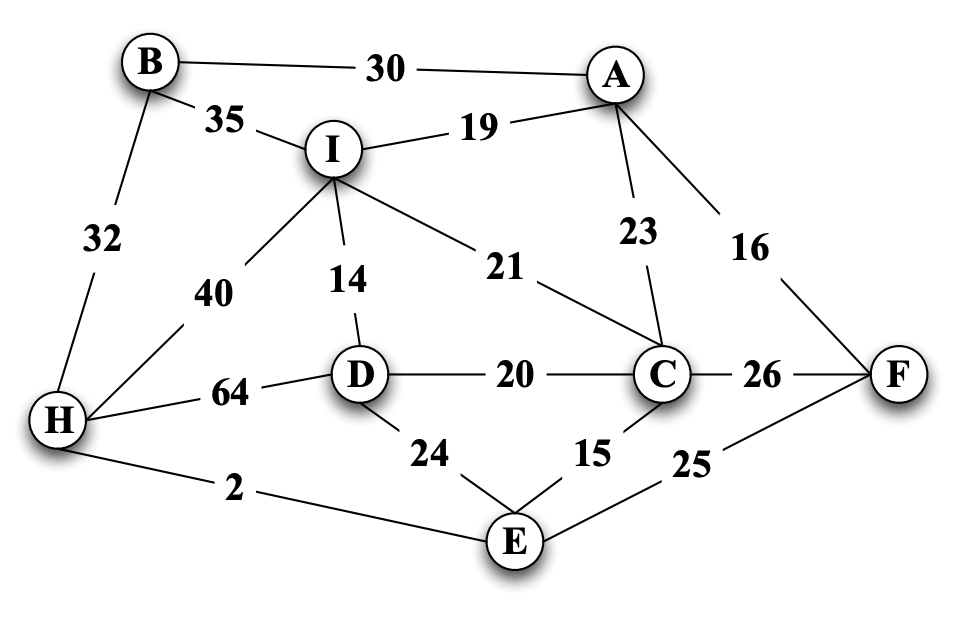

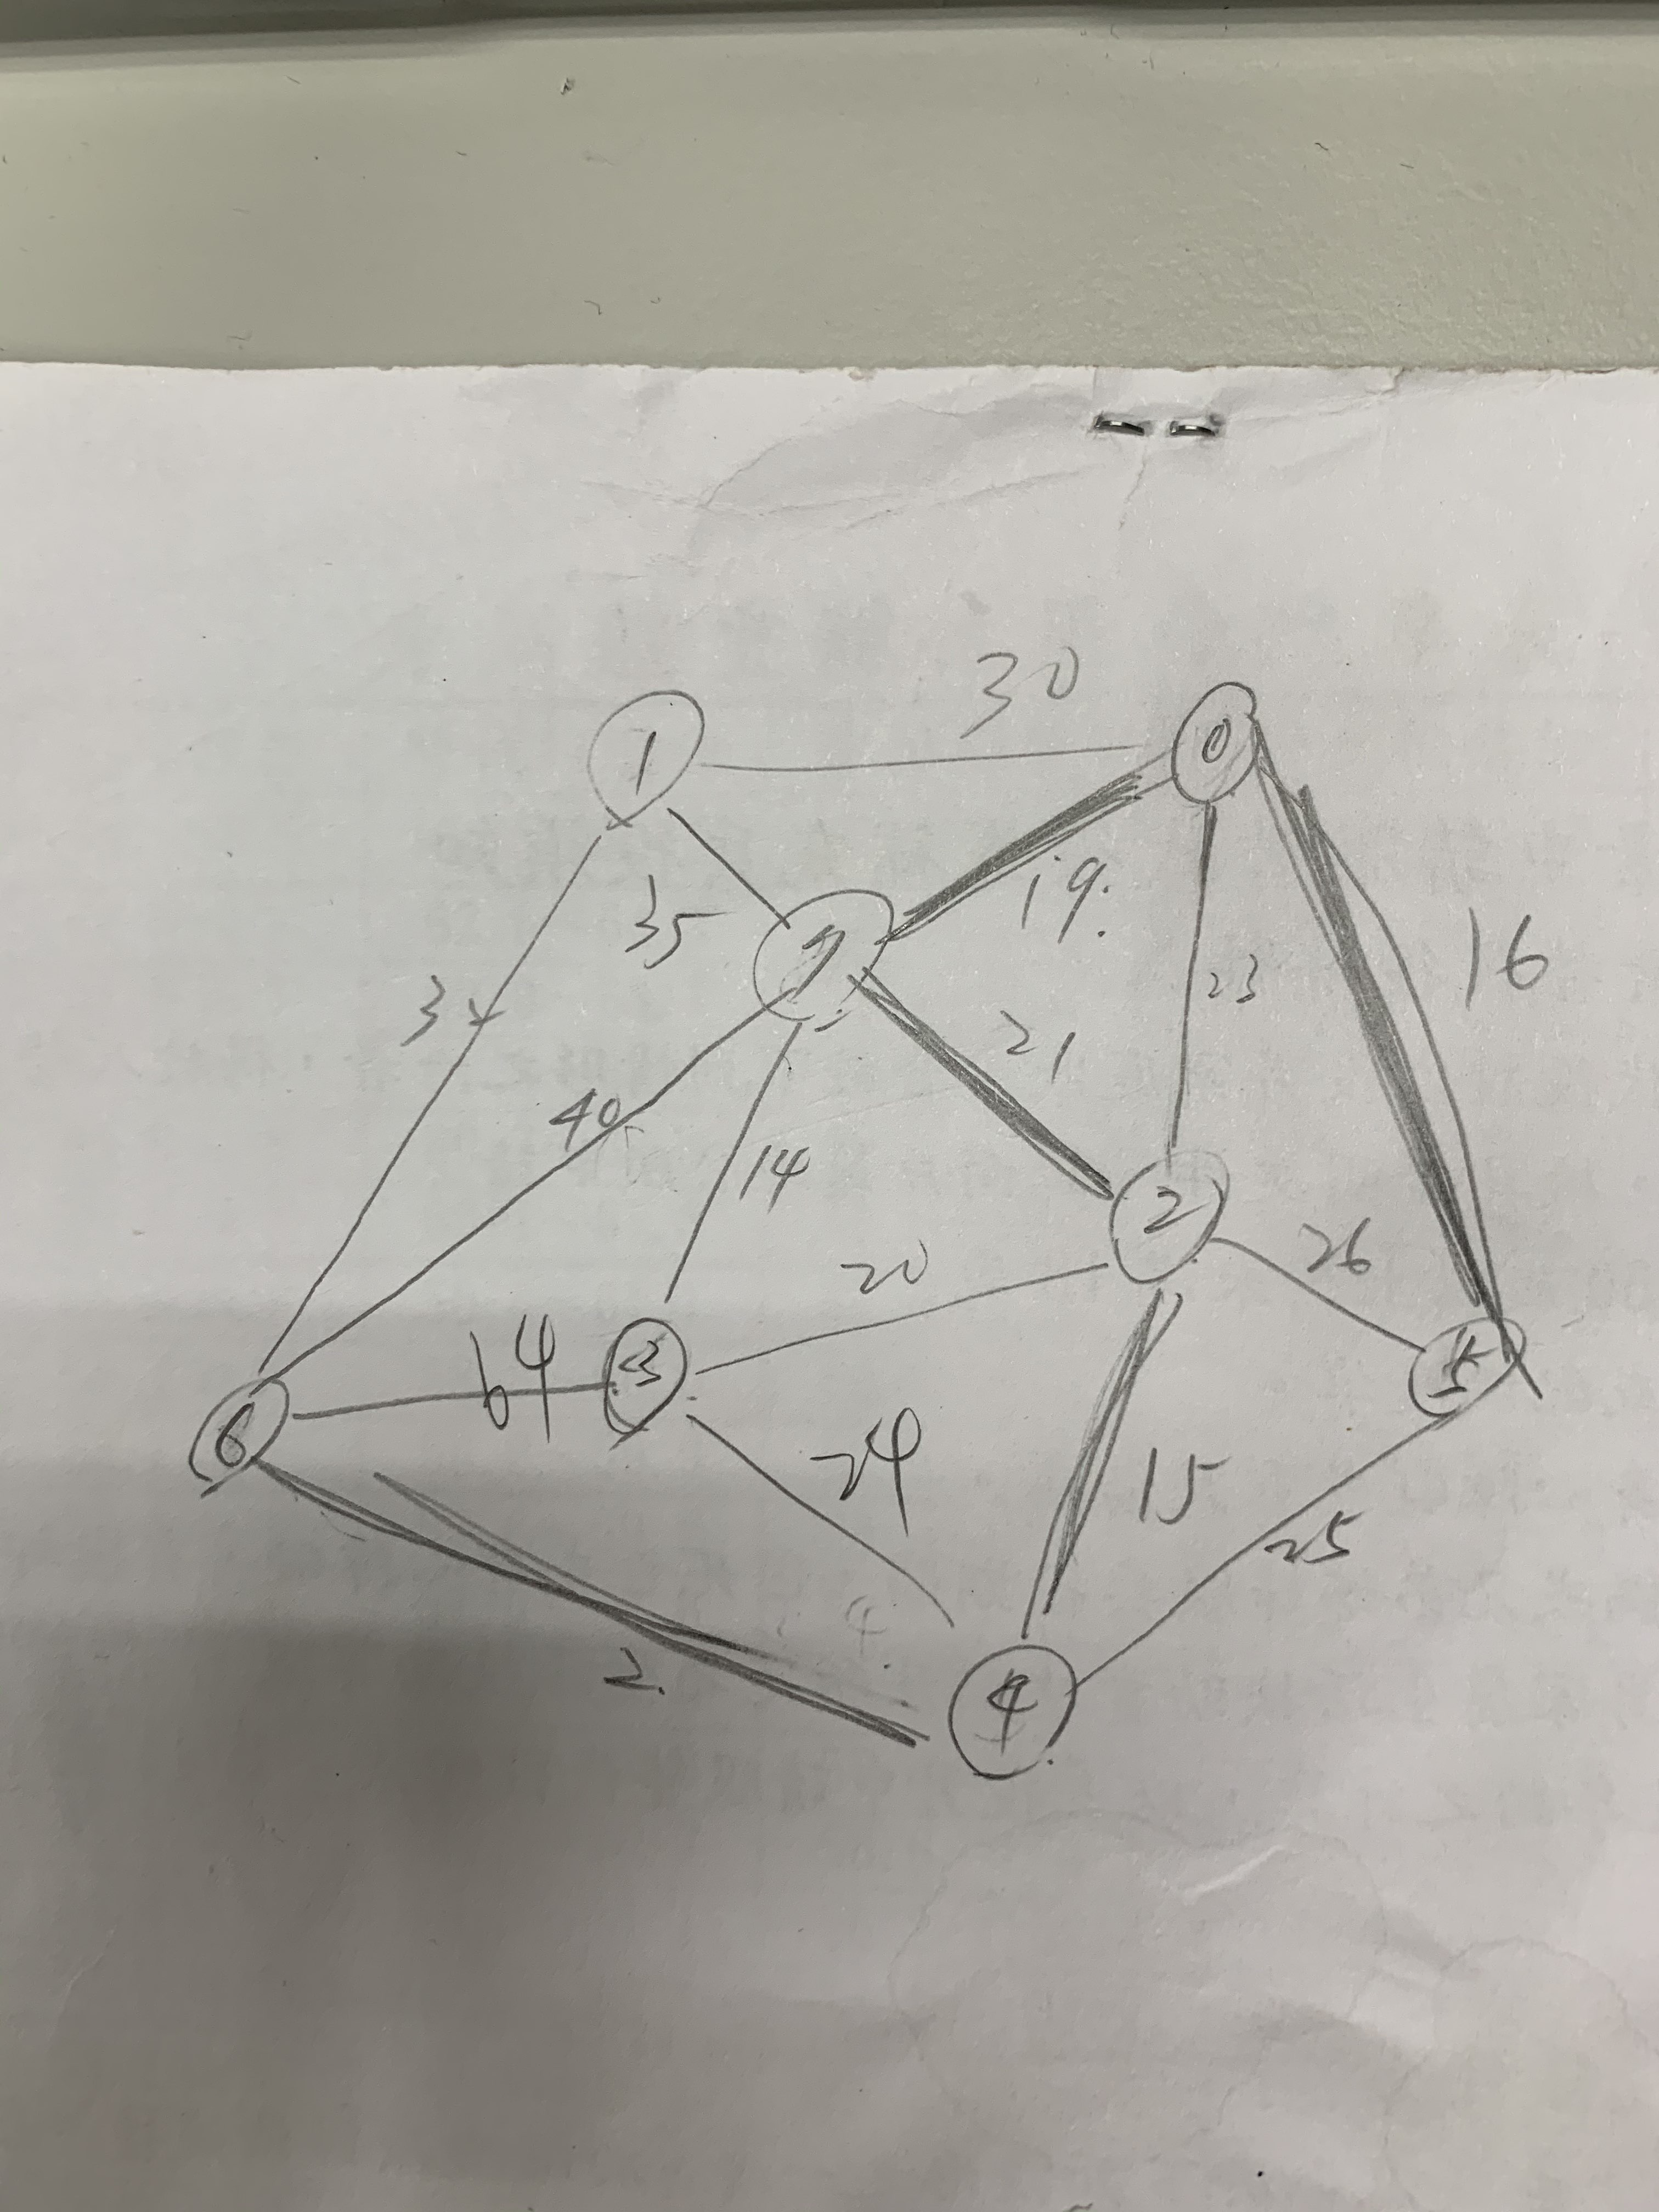

解題想法：

這題使用prim方法

主要需要擔心的部分是

他data建立的方式

[0,1,3]

[點1,點2,邊的質量]

上面有節點編號對照圖

由於是由數字帶過整個字母

需要在最後設計一個for迴圈把parents對到字母上 append到另一陣列做保存

In [36]:
def prim(graph):
    n = len(graph)
    costs = [99999 for _ in range(n)]  # 父結點到該結點的邊權值
    costs[0] = 0
    parents = [-1 for _ in range(n)]
    visited = [False for _ in range(n)]
    t = []
    while len(t) < n:
        # 在costs找最短邊，把該最短邊的結點加入t，標記為已訪問
        minCost = 99999
        minNode = None
        for i in range(n):
            if not visited[i] and costs[i] < minCost:
                minCost = costs[i]
                minNode = i
        t.append(minNode)
        visited[minNode] = True

        # 遍歷該結點的邊，更新最短邊
        for edge in graph[minNode]:
            if not visited[edge[0]] and edge[1] < costs[edge[0]]:
                costs[edge[0]] = edge[1]
                parents[edge[0]] = minNode
    print('加入的邊的順序',t) #印出所有拜訪順序
    return costs, parents

# 各個邊的值 以及相連的節點
data = [
    [0, 1, 30],
    [0, 2, 23],
    [0, 5, 16],
    [0, 7, 19],
    [1, 7, 35],
    [1, 6, 32],
    [2, 3, 20],
    [2, 4, 15],
    [2, 5, 26],
    [2, 7, 21],
    [3, 4, 24],
    [3, 6, 64],
    [3, 7, 14],
    [4, 5, 25],
    [4, 6, 2],
    [6, 7, 40],
]



# 構造鄰接表
n = 8
graph = [[] for _ in range(n)]
for edge in data:
    graph[edge[0]].append([edge[1], edge[2]])
    graph[edge[1]].append([edge[0], edge[2]])

# 最小生成樹MST
print('MST')
costs, parents = prim(graph)
print('costs:', costs)
print('parents', parents)
total = 0
for cost in costs:
    total += cost
print('Total cost of MST:', total)



MST
加入的邊的順序 [0, 5, 7, 3, 2, 4, 6, 1]
costs: [0, 30, 20, 14, 15, 16, 2, 19]
parents [-1, 0, 3, 7, 2, 0, 4, 0]
Total cost of MST: 116
